<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [15]:
import pandas as pd
import numpy as np
# from collections import namedtuple   # Convenient to store the data rows

In [31]:
df = pd.read_csv('./data/chipotle.tsv', sep = '\t')

In [17]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [12]:
# this is handled by pandas.read_csv()

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [32]:
# clean item_price to convert to numeric
df['item_price'] = df['item_price'].str.replace("$","")
# conver to numeric
df['item_price'] = df['item_price'].astype('float')

In [33]:
df[df['item_name'] == "Canned Soda"].head()

,order_id,quantity,item_name,choice_description,item_price
18,9,2,Canned Soda,[Sprite],2.18
28,14,1,Canned Soda,[Dr. Pepper],1.09
51,23,2,Canned Soda,[Mountain Dew],2.18
53,24,1,Canned Soda,[Sprite],1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09


### Part 3 Analysis:
##### Although it is clear that quantity accounts for the item price, it is not necessary to consider when calculating the average order price. It will be sufficient to take the average of the sums of each unique order, which can be easilyl done with groupby()

In [37]:
df.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

### Part 3 solution: Average order: $18.81

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [49]:
unique_sodas = set(x for x in df['item_name'].unique().tolist() if "Canned" in x)

In [50]:
unique_sodas

{'Canned Soda', 'Canned Soft Drink'}

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [58]:
df[df['item_name'].str.contains('Burrito')]['choice_description'].isnull().any()

False

In [74]:
df[df['item_name'].str.contains('Burrito')]['choice_description'][7]

'[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]'

In [75]:
type(df[df['item_name'].str.contains('Burrito')]['choice_description'][7])

str

#### I need a simple way to de-nest the listed items. This is accomplished with string method replace because each item row element is a string type, so eliminating the brackets, and creating a list by splitting the string on commas with whitespace should work well

In [80]:
df[df['item_name'].str.contains('Burrito')]['choice_description'][7].replace('[','').replace(']','').split(', ')

['Tomatillo Red Chili Salsa',
 'Fajita Vegetables',
 'Black Beans',
 'Pinto Beans',
 'Cheese',
 'Sour Cream',
 'Guacamole',
 'Lettuce']

In [103]:
toppings_burrito = [x.replace('[','').replace(']','').split(', ') for x in df[df['item_name'].str.contains('Burrito')]['choice_description']]

In [109]:
toppings_burrito[0]

['Tomatillo Red Chili Salsa',
 'Fajita Vegetables',
 'Black Beans',
 'Pinto Beans',
 'Cheese',
 'Sour Cream',
 'Guacamole',
 'Lettuce']

In [105]:
np.mean([len(x) for x in toppings_burrito])

5.395051194539249

#### Part 5 Solution: the average burrito has approximately 5 toppings on average

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [115]:
dict(df[df['item_name'].str.contains('Chips')].groupby('item_name')['quantity'].sum())

{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

### The above solution is simple, however the results are distorted by the selective use of hyphens in the data; we deserve clean data for the most robust analysis

In [117]:
df['item_name'].unique().tolist()

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos',
 'Chicken Soft Tacos',
 'Chicken Burrito',
 'Canned Soda',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Carnitas Bowl',
 'Bottled Water',
 'Chips and Tomatillo Green Chili Salsa',
 'Barbacoa Bowl',
 'Chips',
 'Chicken Salad Bowl',
 'Steak Bowl',
 'Barbacoa Soft Tacos',
 'Veggie Burrito',
 'Veggie Bowl',
 'Steak Crispy Tacos',
 'Chips and Tomatillo Red Chili Salsa',
 'Barbacoa Crispy Tacos',
 'Veggie Salad Bowl',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Carnitas Soft Tacos',
 'Chicken Salad',
 'Canned Soft Drink',
 'Steak Salad Bowl',
 '6 Pack Soft Drink',
 'Chips and Tomatillo-Red Chili Salsa',
 'Bowl',
 'Burrito',
 'Crispy Tacos',
 'Carnitas Crispy Tacos',
 'Steak Salad',
 'Chips and Mild Fresh Tomato Salsa',
 'Veggie Soft 

### Quick look at the above suggests simple replace of the hyphens should leave us with cleaner data

In [118]:
df['item_name'] = df['item_name'].str.replace('-', ' ')

In [119]:
dict(df[df['item_name'].str.contains('Chips')].groupby('item_name')['quantity'].sum())

{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 41,
 'Chips and Tomatillo Green Chili Salsa': 78,
 'Chips and Tomatillo Red Chili Salsa': 75,
 'Side of Chips': 110}

### Part 6 solution: [above]

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


### Q: Which salsa is the most popular?

In [171]:
salsa = pd.Series([x.replace('[','').replace(']','').split(', ') for x in df['choice_description'].dropna()[df['choice_description'].dropna().str.contains('Salsa')]])

In [180]:
len(salsa)

2808

In [198]:
count_salsa = pd.Series([s[0] for s in salsa]).value_counts()[:8]

### Although there are a few outliers for this method, none are enough to significantly distort the results. How about some viz?

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

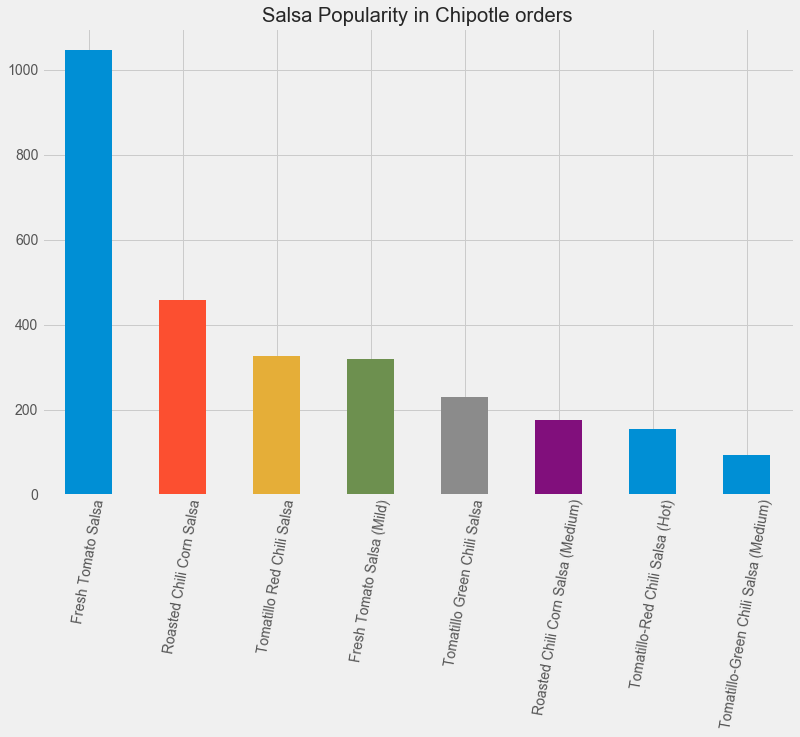

In [217]:
plt.style.use('fivethirtyeight')
count_salsa.plot(kind = 'bar',
                 figsize = (12,8),
                 rot = 80,
                 title = 'Salsa Popularity in Chipotle orders');

### To go a bit further: I wonder if the type of salsa is at all related to the type of main

In [219]:
df['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl',
       'Steak Bowl', 'Barbacoa Soft Tacos', 'Veggie Burrito',
       'Veggie Bowl', 'Steak Crispy Tacos',
       'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos',
       'Veggie Salad Bowl', 'Chips and Roasted Chili Corn Salsa',
       'Carnitas Soft Tacos', 'Chicken Salad', 'Canned Soft Drink',
       'Steak Salad Bowl', '6 Pack Soft Drink', 'Bowl', 'Burrito',
       'Crispy Tacos', 'Carnitas Crispy Tacos', 'Steak Salad',
       'Chips and Mild Fresh Tomato Salsa', 'Veggie Soft Tacos',
       'Carnitas Salad Bowl', 'Barbacoa Salad Bow

In [289]:
unique_mains = ['Chicken',
                'Steak',
                'Barbacoa',
                'Carnitas',
                'Veggie',
                'Chips']

In [291]:
unique_salsa = pd.Series([s[0] for s in salsa]).value_counts()[:8].index.tolist()

In [292]:
unique_salsa

['Fresh Tomato Salsa',
 'Roasted Chili Corn Salsa',
 'Tomatillo Red Chili Salsa',
 'Fresh Tomato Salsa (Mild)',
 'Tomatillo Green Chili Salsa',
 'Roasted Chili Corn Salsa (Medium)',
 'Tomatillo-Red Chili Salsa (Hot)',
 'Tomatillo-Green Chili Salsa (Medium)']

In [309]:
def item_from(item, item_list):
       
    for i in item_list:
        if i in item:
            value = i
            break
        else:
            value = np.nan
    return(value)

In [310]:
df['main'] = df['item_name'].apply(lambda x: item_from(x, unique_mains))

In [311]:
df['salsa'] = df['choice_description'].fillna('nada').apply(lambda x: item_from(x, unique_salsa))

In [314]:
df['salsa2'] = df['item_name'].apply(lambda x: item_from(x, unique_salsa))

In [318]:
df['salsa'] = df['salsa'].fillna(df['salsa2'])

In [322]:
df.drop('salsa2',
        axis = 1,
        inplace = True)

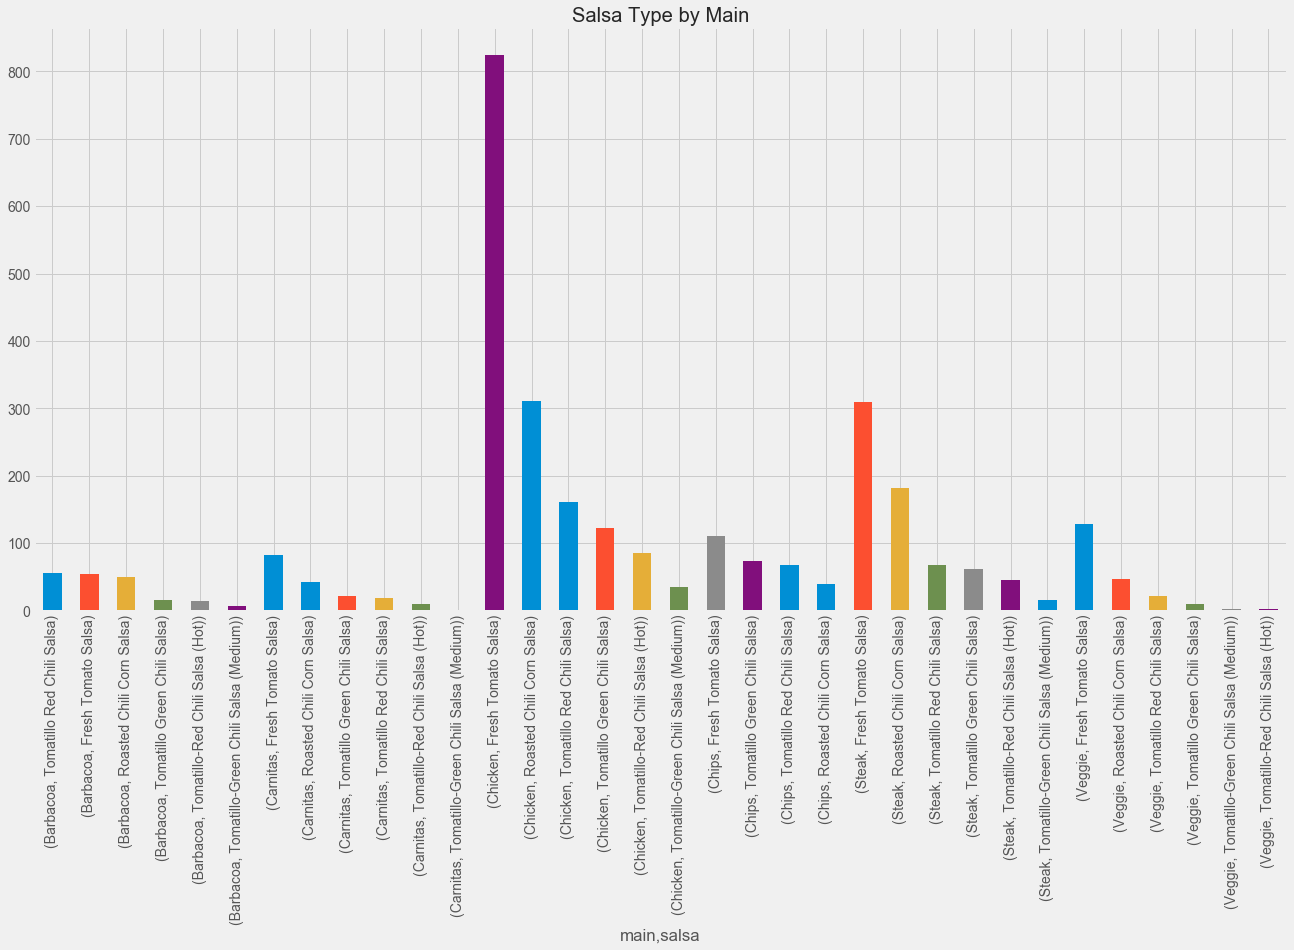

In [398]:
df.groupby('main')['salsa'].value_counts().plot(kind = 'bar',
                                                figsize = (20,10),
                                                title = "Salsa Type by Main");

In [372]:
df_gb = pd.DataFrame(df.groupby('main')['salsa'].value_counts())

In [403]:
df_gb.columns = ['count_salsa']

In [410]:
df_gb.reset_index(inplace = True)

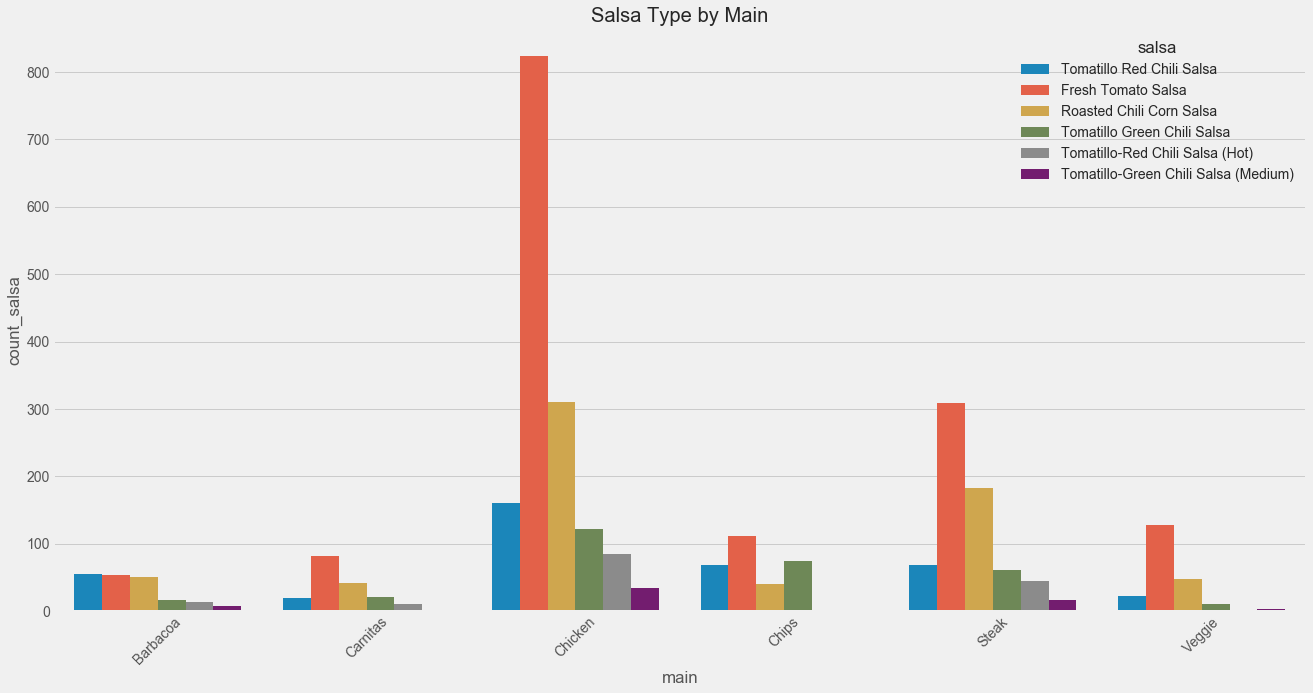

In [415]:
plt.figure(figsize = (20,10))
chart = sns.barplot(df_gb['main'],df_gb['count_salsa'], hue = df_gb['salsa'])
chart.set_title("Salsa Type by Main")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);